In [50]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns, warnings as w
w.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import skew

In [51]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [52]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [53]:
df.shape

(7385, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [55]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [56]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [57]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [58]:
df['Vehicle Class'].value_counts()

Vehicle Class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

In [59]:
df.shape

(7385, 12)

In [60]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [61]:
df['Fuel Type'].value_counts()

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [62]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [63]:
df['Transmission'] = np.where(df['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['M5','M6','M7']),'Manual',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic with Select Shift',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automatic Manual',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'Continuously Variable',df['Transmission'])

In [64]:
df['Fuel Type'] = np.where(df['Fuel Type'] == 'X','Regular Gasoline',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'Z','Premium Gasoline',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'D','Diesel',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'E','Ethanol (E85)',df['Fuel Type'])
df['Fuel Type'] = np.where(df['Fuel Type'] == 'N','Natural Gas',df['Fuel Type'])

In [65]:
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['COMPACT','SUBCOMPACT','MINICOMPACT']),'Compact Vehicle',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['SUV - SMALL','SUV - STANDARD']),'SUV',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['PICKUP TRUCK - STANDARD','PICKUP TRUCK - SMALL']),'Pickup Truck',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['STATION WAGON - SMALL','STATION WAGON - MID-SIZE']),'Station Wagon',df['Vehicle Class'])
df['Vehicle Class'] = np.where(df['Vehicle Class'].isin(['MINIVAN','VAN - PASSENGER','VAN - CARGO']),'Van',df['Vehicle Class'])

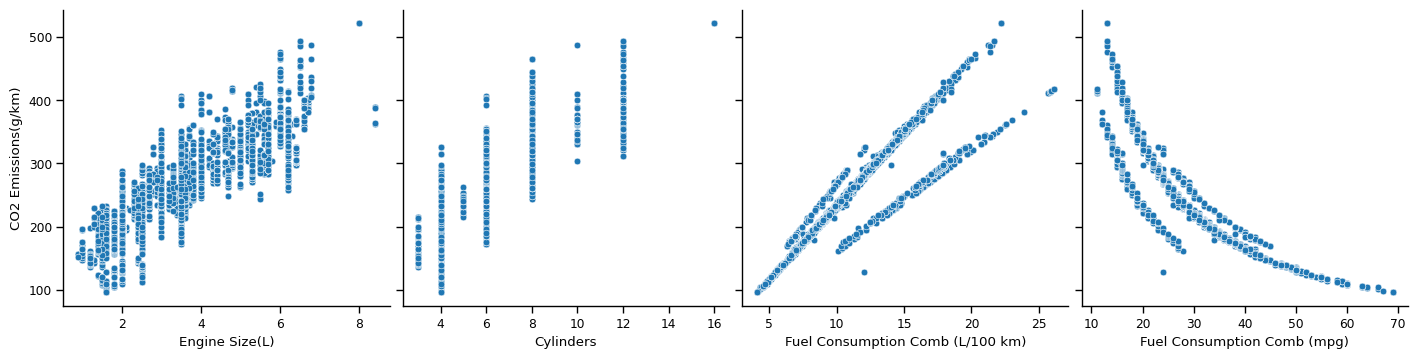

In [66]:
sns.pairplot(df, x_vars=['Engine Size(L)'
                         ,'Cylinders'
                         ,'Fuel Consumption Comb (L/100 km)'
                         ,'Fuel Consumption Comb (mpg)'], y_vars = 'CO2 Emissions(g/km)',size = 3.6,kind = 'scatter')

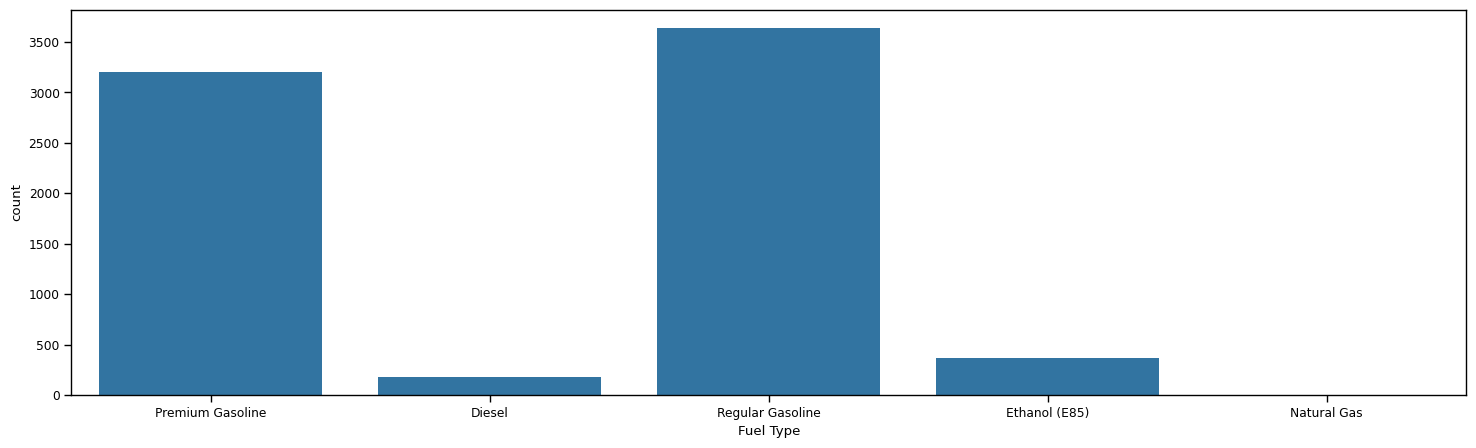

In [67]:
fig, ax = plt.subplots(figsize=(18, 5))
sns.countplot(data = df,x = 'Fuel Type',ax=ax)
plt.show()

# Finding Outliers

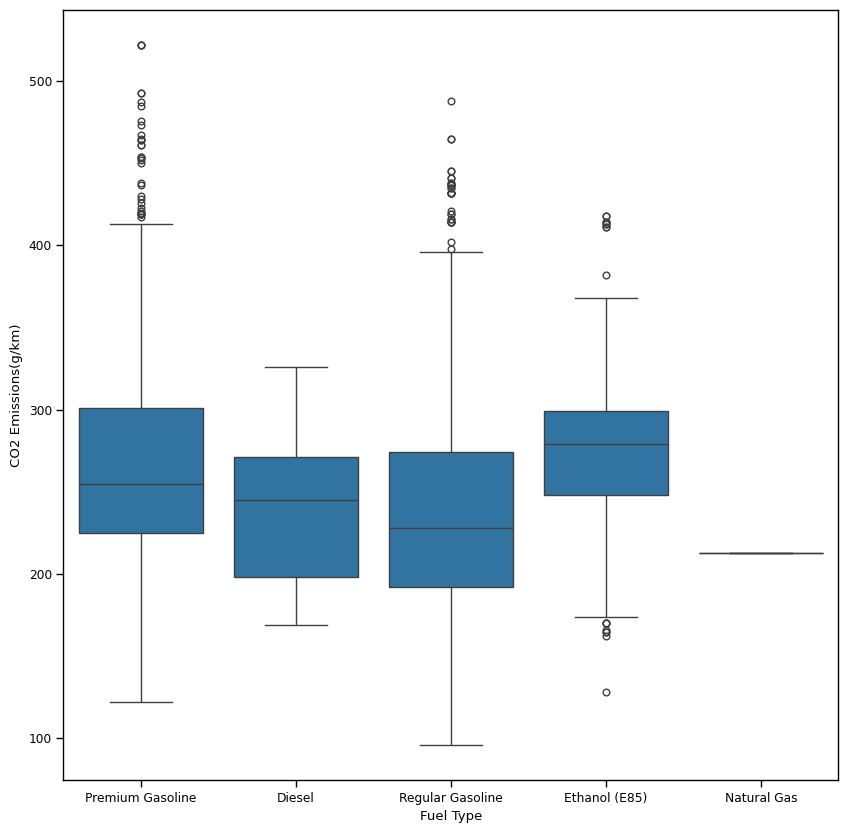

In [68]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df,x='Fuel Type',y='CO2 Emissions(g/km)',ax=ax)
plt.show()

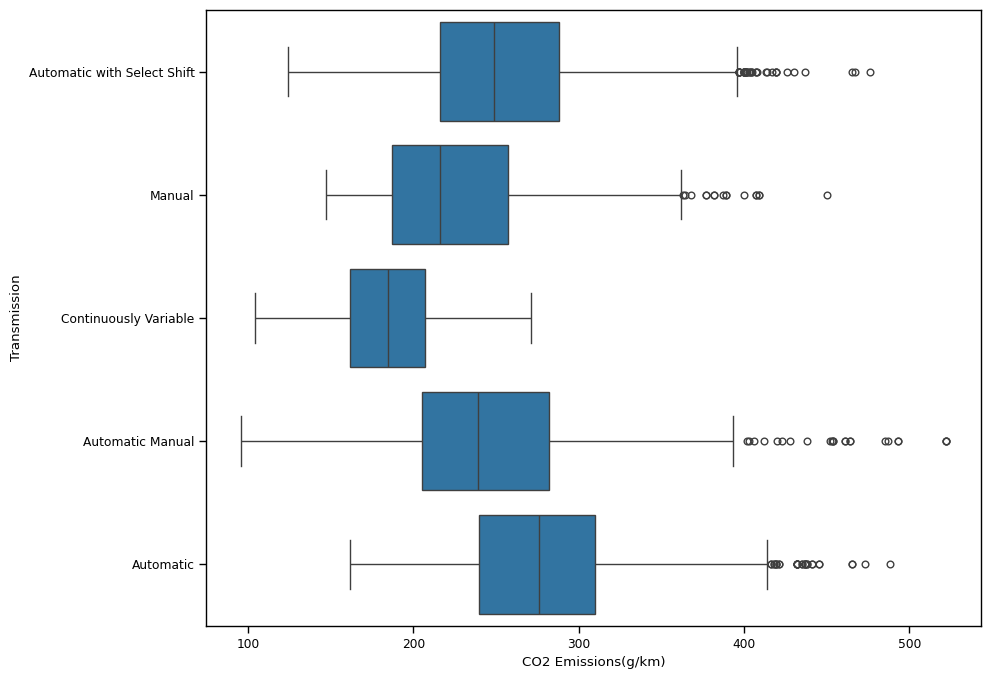

In [69]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df,x='CO2 Emissions(g/km)',y='Transmission',ax=ax)
plt.show()

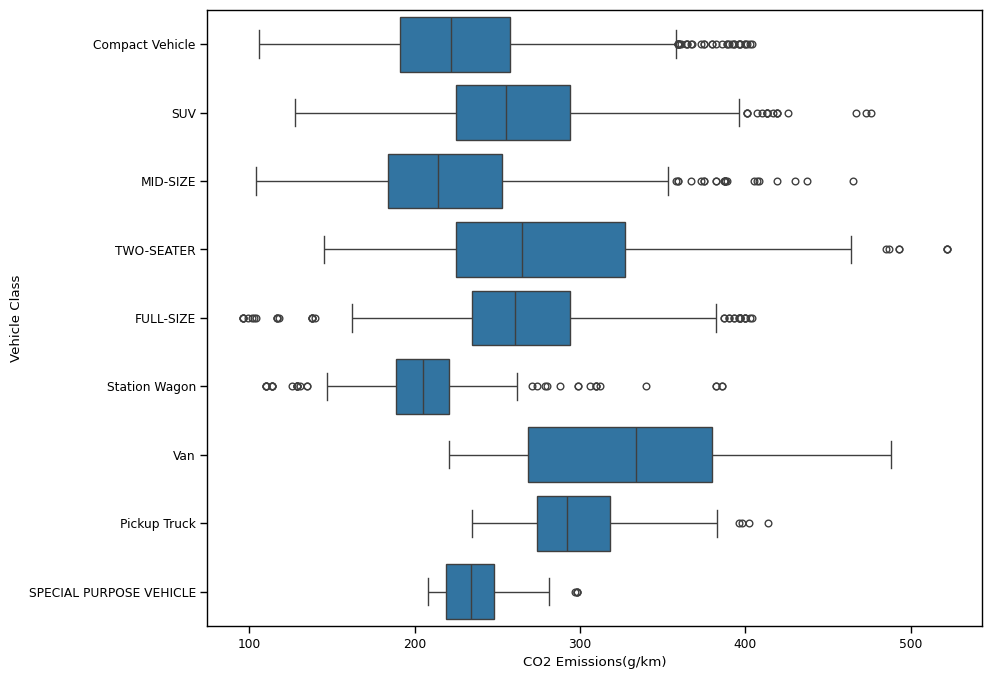

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df,x='CO2 Emissions(g/km)',y='Vehicle Class',ax=ax)
plt.show()

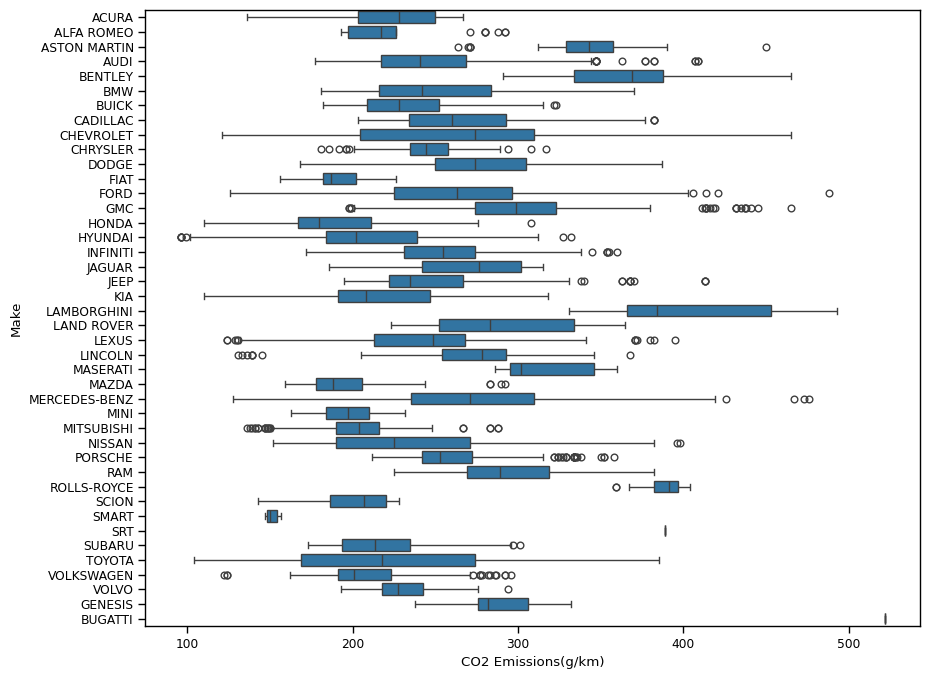

In [71]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df,x='CO2 Emissions(g/km)',y='Make',ax=ax)
plt.show()

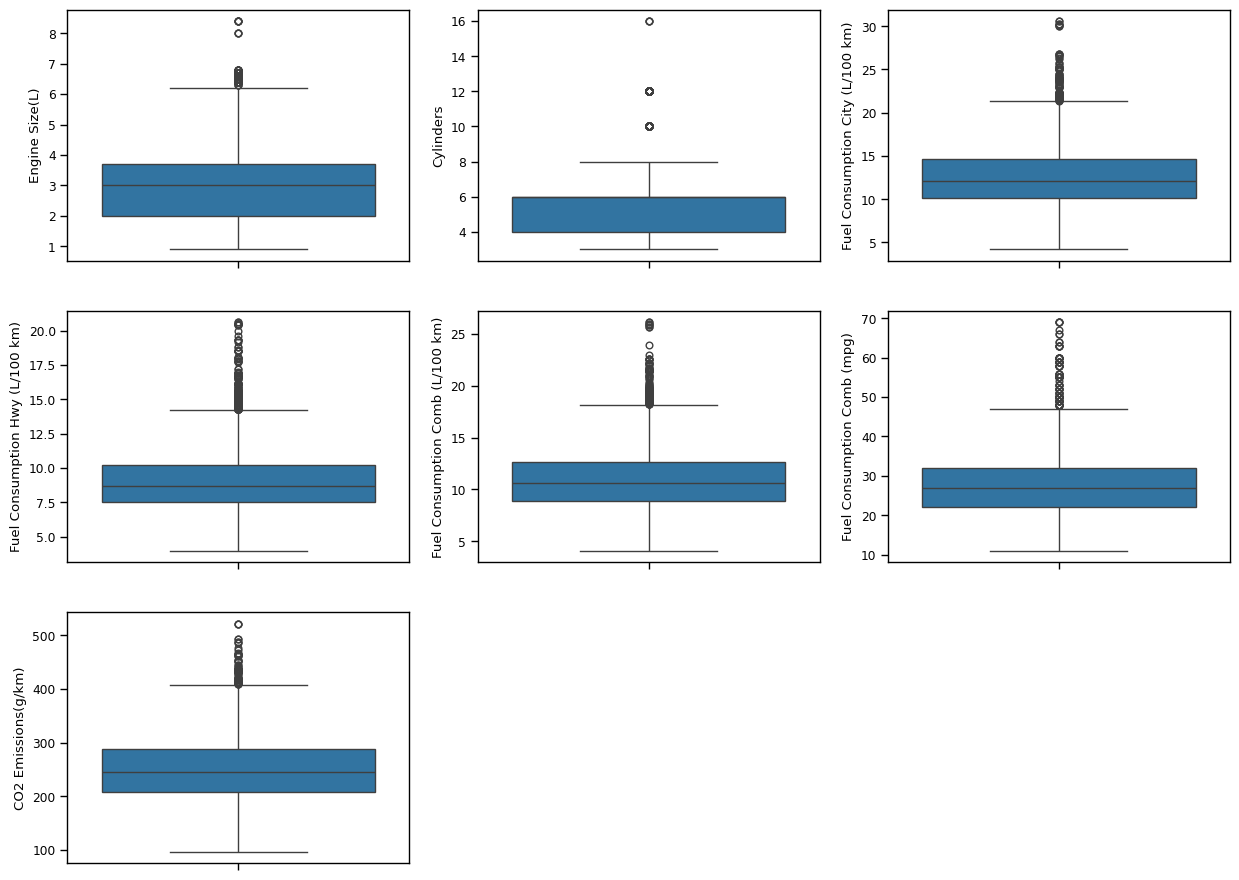

In [72]:
numeric_columns=['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
j=1
fig = plt.figure(figsize = (15,15))
for i in numeric_columns:
    plt.subplot(4,3,j)
    sns.boxplot(df[i])
    j=j+1

Average CO2 emissions for Diesel is: 237.55 g/km
Average CO2 emissions for Ethanol (E85) is: 275.09 g/km
Average CO2 emissions for Natural Gas is: 213.00 g/km
Average CO2 emissions for Premium Gasoline is: 266.04 g/km
Average CO2 emissions for Regular Gasoline is: 235.12 g/km


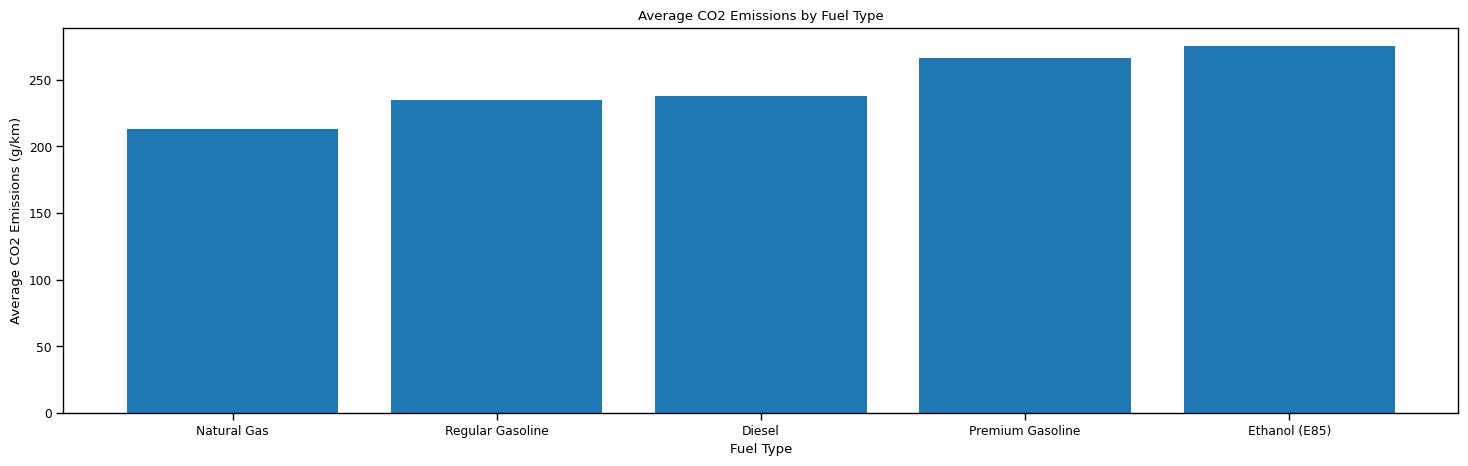

In [73]:
# AVERAGE CARBON DIOXIDE EMISSIONS BY FUEL TYPE
cars_fuel_types = df['Fuel Type'].to_numpy()
cars_co2_emissions = df['CO2 Emissions(g/km)'].to_numpy()
fuel_types = np.unique(cars_fuel_types)
co2_means = []
for ft in fuel_types:
    mask = (cars_fuel_types == ft)
    co2_mean = np.mean(cars_co2_emissions[mask])
    co2_means.append(co2_mean)
    print(f"Average CO2 emissions for {ft} is: {co2_mean:.2f} g/km")
co2_means, fuel_types = zip(*sorted(zip(co2_means, fuel_types)))
f, ax = plt.subplots(figsize=(18,5))
plt.bar(fuel_types, co2_means)
plt.title('Average CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average CO2 Emissions (g/km)')
plt.show()

In [74]:
df.select_dtypes(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type
0,ACURA,ILX,Compact Vehicle,Automatic with Select Shift,Premium Gasoline
1,ACURA,ILX,Compact Vehicle,Manual,Premium Gasoline
2,ACURA,ILX HYBRID,Compact Vehicle,Continuously Variable,Premium Gasoline
3,ACURA,MDX 4WD,SUV,Automatic with Select Shift,Premium Gasoline
4,ACURA,RDX AWD,SUV,Automatic with Select Shift,Premium Gasoline
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV,Automatic with Select Shift,Premium Gasoline
7381,VOLVO,XC60 T5 AWD,SUV,Automatic with Select Shift,Premium Gasoline
7382,VOLVO,XC60 T6 AWD,SUV,Automatic with Select Shift,Premium Gasoline
7383,VOLVO,XC90 T5 AWD,SUV,Automatic with Select Shift,Premium Gasoline


# Removing Outliers by Capping

In [75]:
df_copy = df.copy()

(7385, 12)


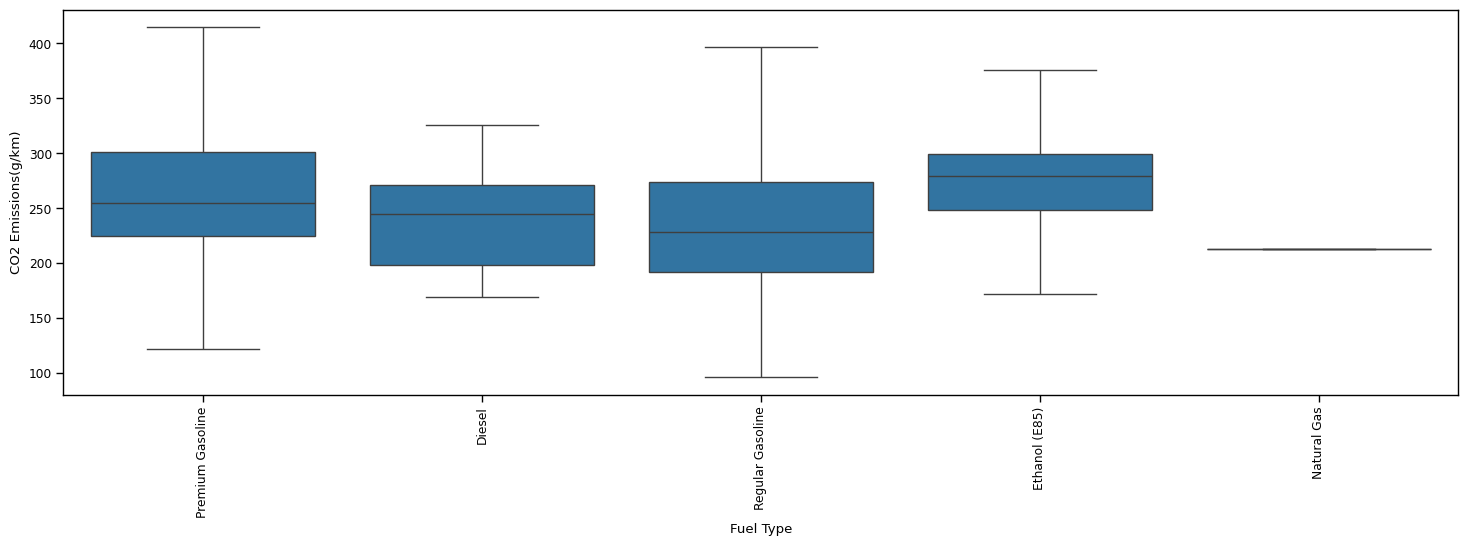

In [76]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Fuel Type']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Fuel Type']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Fuel Type']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Fuel Type']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = lower
    return dataframe
for i in ['Premium Gasoline','Regular Gasoline','Ethanol (E85)']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Fuel Type',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

(7385, 12)


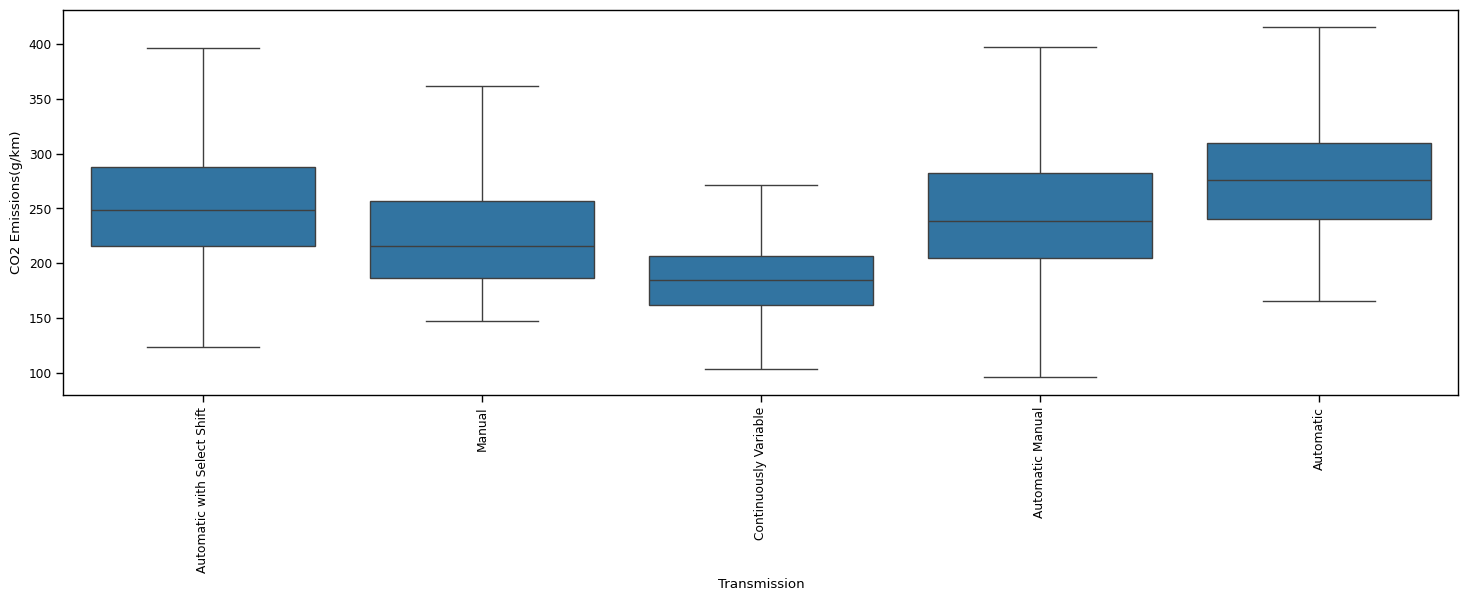

In [77]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Transmission']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Transmission']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Transmission']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Transmission']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = upper
    return dataframe
for i in ['Automatic with Select Shift','Manual','Automatic Manual','Automatic']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Transmission',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

(7385, 12)


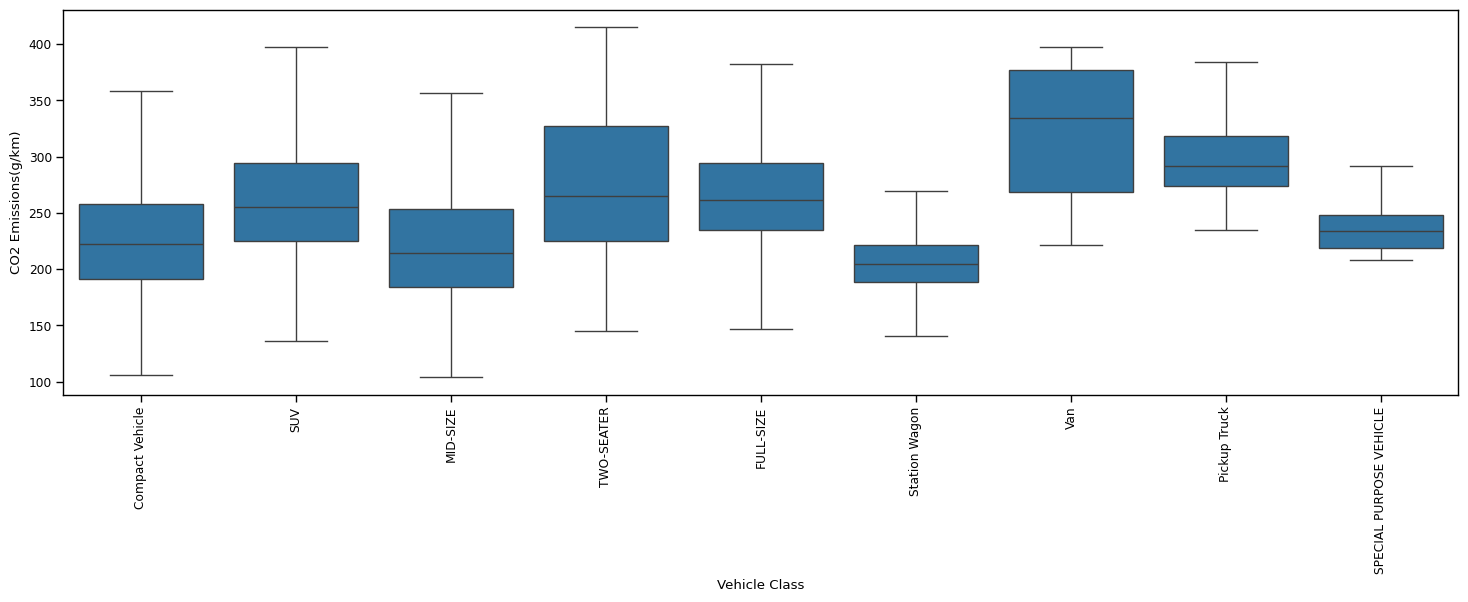

In [78]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Vehicle Class']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Vehicle Class']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Vehicle Class']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Vehicle Class']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = lower
    return dataframe
for i in ['Compact Vehicle','Station Wagon','Pickup Truck','SUV','MID-SIZE','FULL-SIZE'
          ,'SPECIAL PURPOSE VEHICLE']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Vehicle Class',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

(7385, 12)


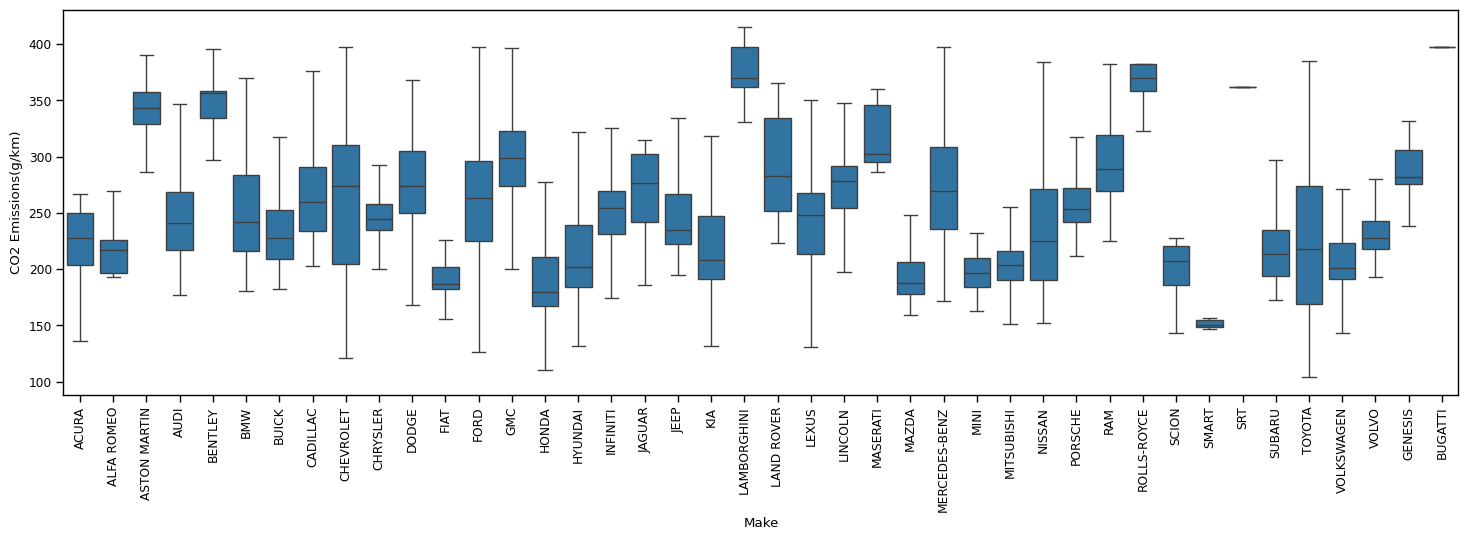

In [79]:
def capping_outliers(dataframe, value):
    q1 = dataframe[dataframe['Make']==value]['CO2 Emissions(g/km)'].quantile(0.25)
    q3 = dataframe[dataframe['Make']==value]['CO2 Emissions(g/km)'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    dataframe.loc[dataframe[(dataframe['Make']==value) & (dataframe['CO2 Emissions(g/km)']>= upper)].index,'CO2 Emissions(g/km)'] = upper
    dataframe.loc[dataframe[(dataframe['Make']==value) & (dataframe['CO2 Emissions(g/km)']<= lower)].index,'CO2 Emissions(g/km)'] = lower
    return dataframe
for i in ['ALFA ROMEO','ASTON MARTIN','AUDI','BUICK','CADILLAC','CHRYSLER','FORD','GMC',
         'HONDA','HYUNDAI','INFINITI','JEEP','LEXUS','LINCOLN','MAZDA','MERCEDES-BENZ',
         'MITSUBISHI','NISSAN','PORSCHE','ROLLS-ROYCE','SUBARU','VOLKSWAGEN','VOLVO','BENTLEY']:df_copy = capping_outliers(df_copy,i)
print(df_copy.shape)
plt.figure(figsize=(18,5))
sns.boxplot(data=df_copy, x='Make',y='CO2 Emissions(g/km)')
plt.xticks(rotation=90)
plt.show()

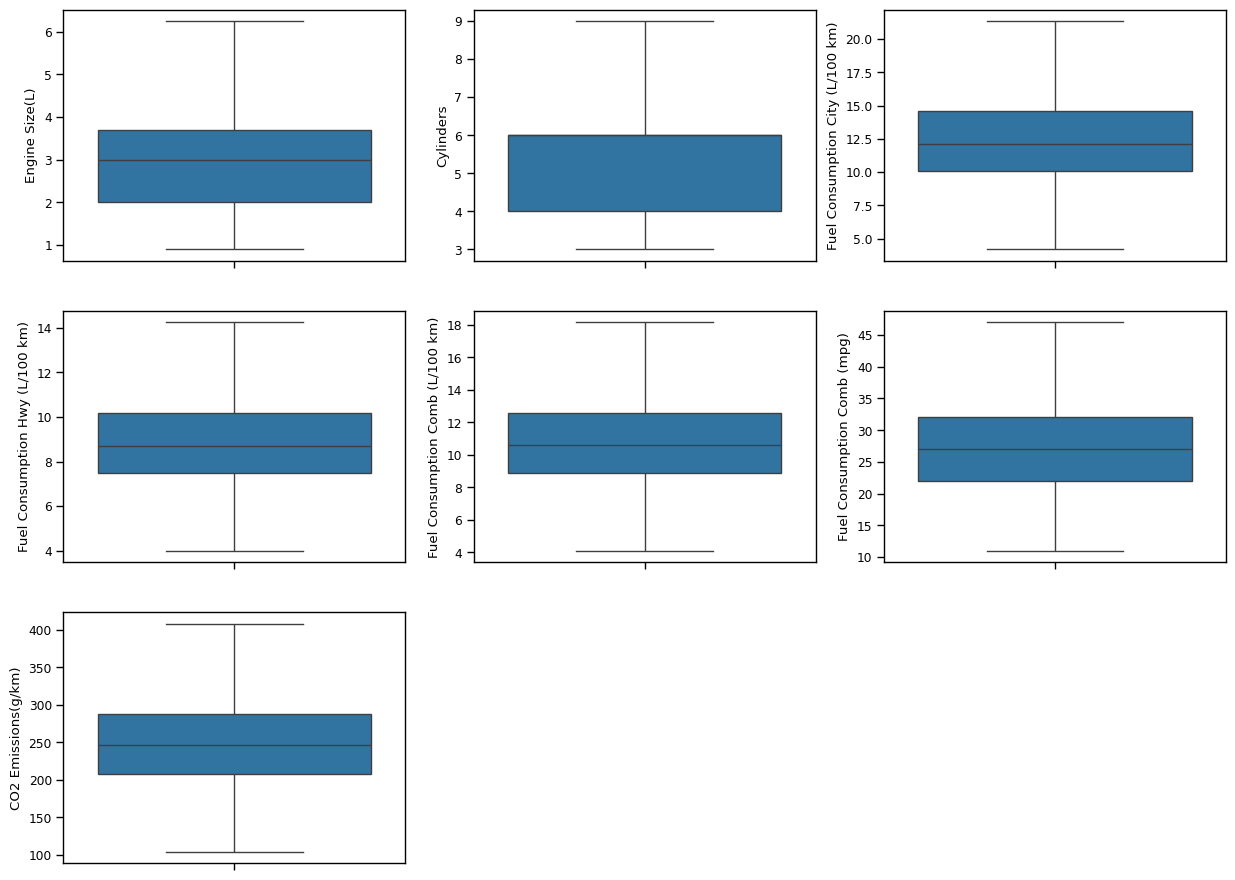

In [80]:
columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
j = 1
fig = plt.figure(figsize = (15,15))
for i in columns:
    q1 = df_copy[i].quantile(0.25)
    q3 = df_copy[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + iqr * 1.5
    lower = q1 - iqr * 1.5
    df_copy[i] = np.where(df_copy[i]>= upper, upper,np.where(df_copy[i]<= lower,lower ,df_copy[i]))
    plt.subplot(4,3,j)
    sns.boxplot(df_copy[i])
    j += 1

# Checking for Skewness

Engine Size(L)
0.7451405533790945


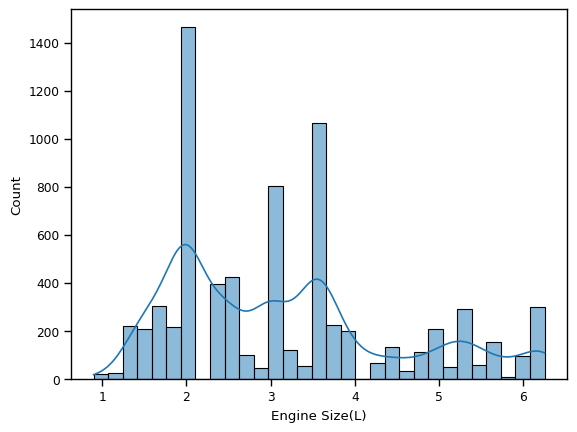

Cylinders
0.4884774347616392


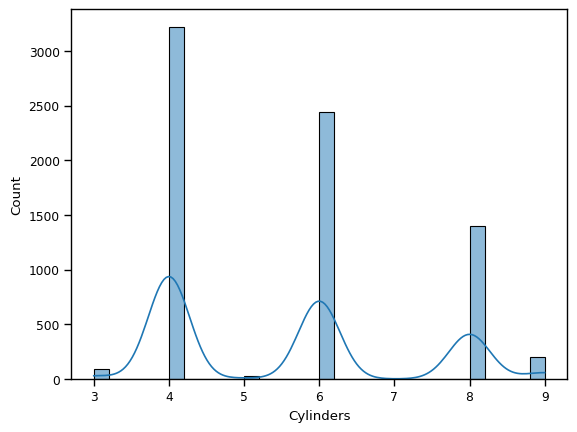

Fuel Consumption City (L/100 km)
0.5573164933407336


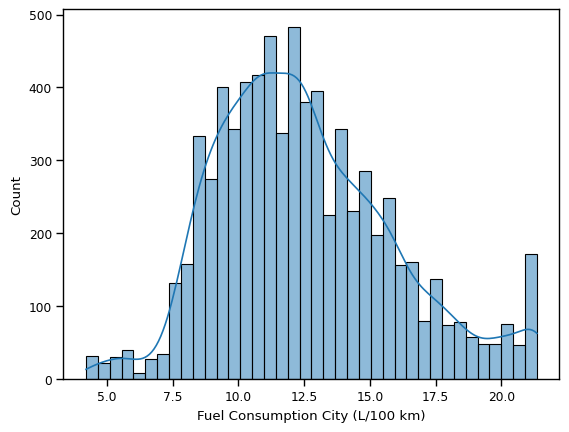

Fuel Consumption Hwy (L/100 km)
0.6452847096089573


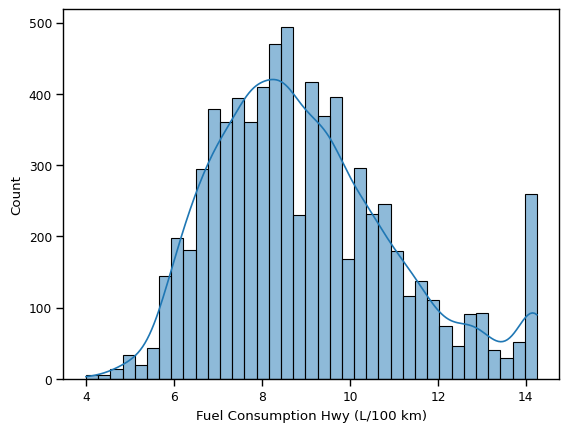

Fuel Consumption Comb (L/100 km)
0.5988730922947881


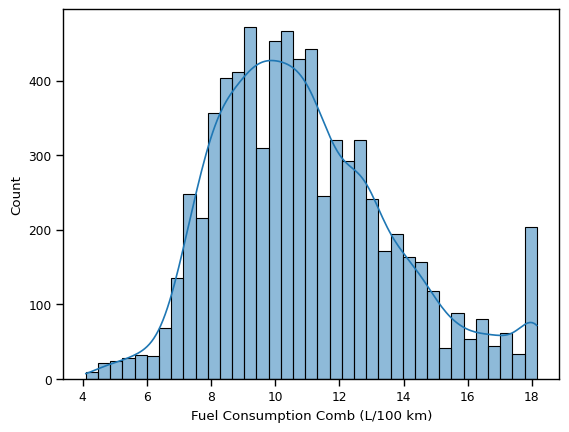

Fuel Consumption Comb (mpg)
0.49152198410196707


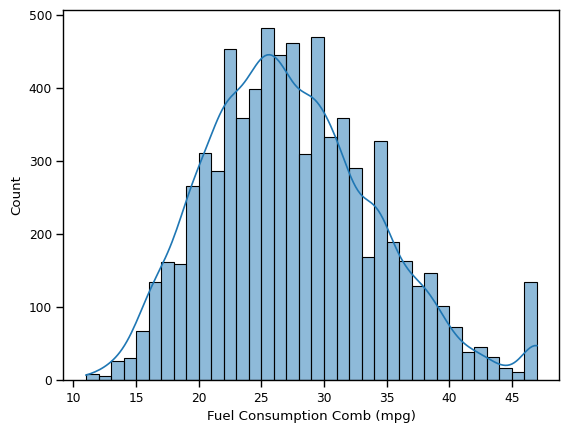

CO2 Emissions(g/km)
0.32797664775500907


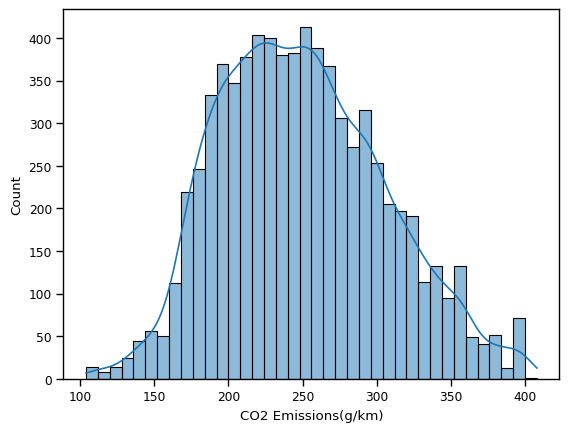

In [81]:
for col in ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']:
    print(col)
    print(skew(df_copy[col]))
    plt.figure()
    sns.histplot(df_copy[col], kde=True)
    plt.show()

# Handling Skewness

Engine Size(L)
0.4237533871392681


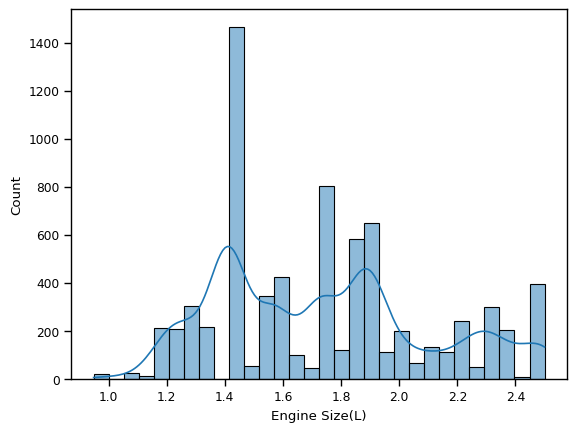

Cylinders
0.34477047129100824


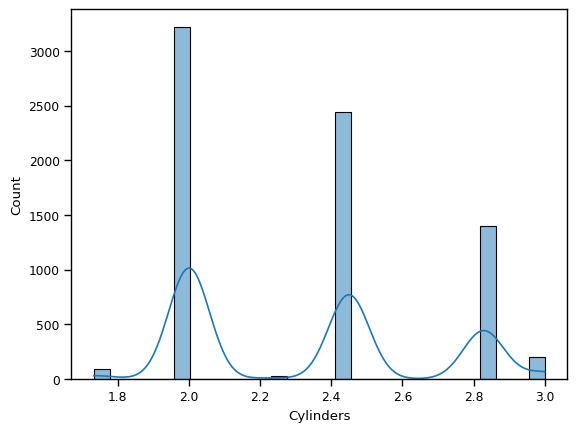

Fuel Consumption City (L/100 km)
0.17813847145688405


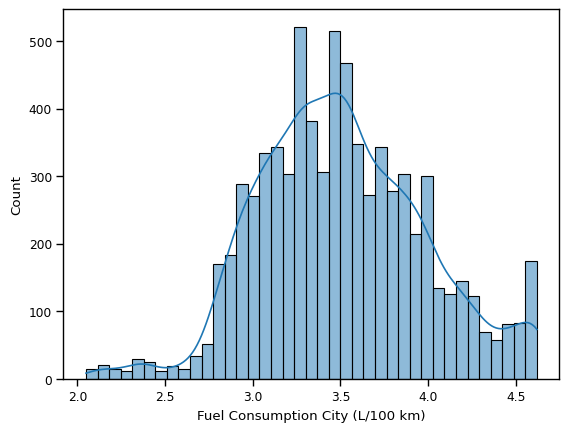

Fuel Consumption Hwy (L/100 km)
0.3748023934659944


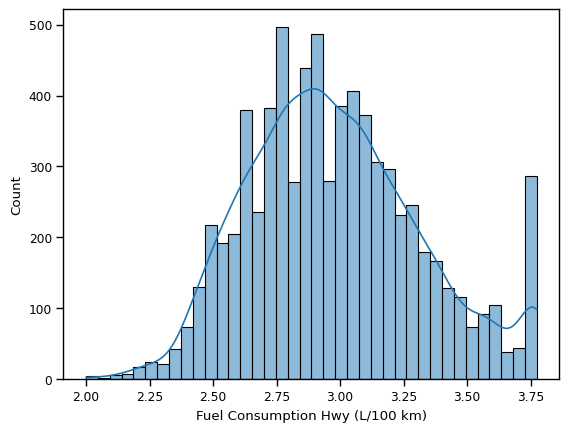

Fuel Consumption Comb (L/100 km)
0.2701938384229055


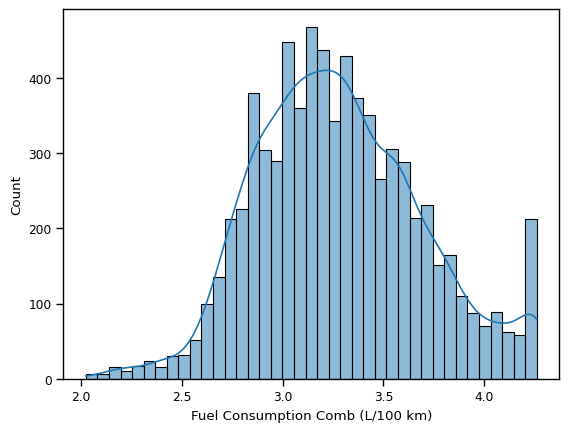

Fuel Consumption Comb (mpg)
0.1559777797251419


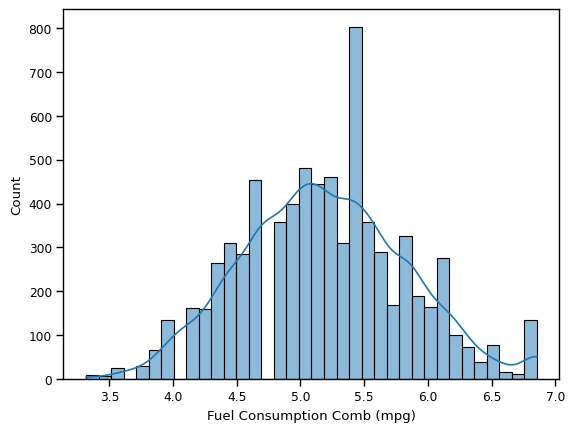

CO2 Emissions(g/km)
0.057626208972945334


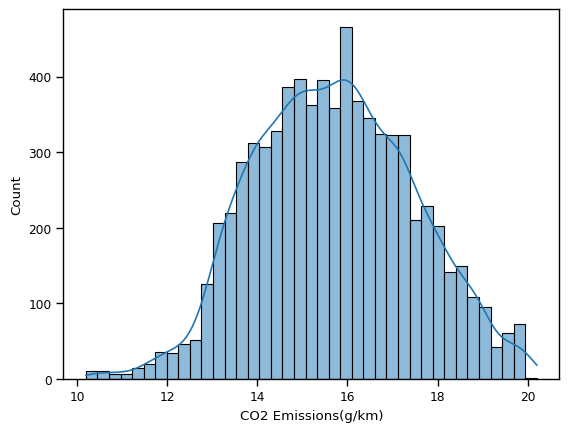

In [82]:
for col in ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']:
    df_copy[col] = np.sqrt(df_copy[col])
    print(col)
    print(skew(df_copy[col]))
    plt.figure()
    sns.histplot(df_copy[col], kde=True)
    plt.show()

# Correlation between Numeric Columns

<Axes: >

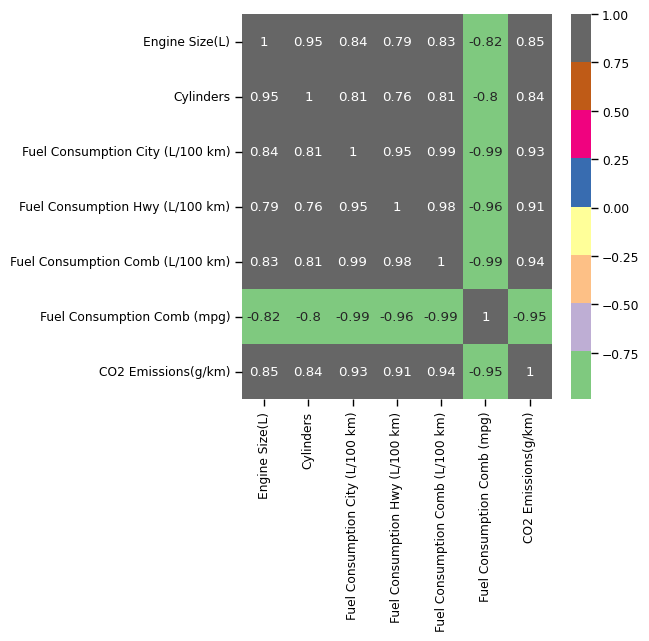

In [83]:
plt.figure(figsize=(5,5))
sns.set_context('paper', font_scale=1)
sns.heatmap(df_copy.select_dtypes(include=['int64','float64']).corr(), annot=True, cmap='Accent')

In [84]:
new_df = pd.DataFrame(df_copy)

In [85]:
new_df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,Compact Vehicle,1.414214,2.00000,Automatic with Select Shift,Premium Gasoline,3.146427,2.588436,2.915476,5.744563,14.000000
1,ACURA,ILX,Compact Vehicle,1.549193,2.00000,Manual,Premium Gasoline,3.346640,2.774887,3.098387,5.385165,14.866069
2,ACURA,ILX HYBRID,Compact Vehicle,1.224745,2.00000,Continuously Variable,Premium Gasoline,2.449490,2.408319,2.428992,6.855655,11.661904
3,ACURA,MDX 4WD,SUV,1.870829,2.44949,Automatic with Select Shift,Premium Gasoline,3.563706,3.016621,3.331666,5.000000,15.968719
4,ACURA,RDX AWD,SUV,1.870829,2.44949,Automatic with Select Shift,Premium Gasoline,3.478505,2.949576,3.255764,5.196152,15.620499


# Taking the First Row for Future Prediction

In [86]:
target = ["CO2 Emissions(g/km)"]

In [87]:
X_future = new_df[0:1]

new_df = new_df[1:]

Y_future = X_future[target]

X_future.drop("CO2 Emissions(g/km)", axis=1, inplace=True)

X_future

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,ACURA,ILX,Compact Vehicle,1.414214,2.0,Automatic with Select Shift,Premium Gasoline,3.146427,2.588436,2.915476,5.744563


In [88]:
Y_future

,CO2 Emissions(g/km)
0,14.0


Dropping the 'Model' column because there are too many Models of cars in the dataset which makes analysis look very messy

In [89]:
new_df.drop('Model',axis=1)

,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1,ACURA,Compact Vehicle,1.549193,2.00000,Manual,Premium Gasoline,3.346640,2.774887,3.098387,5.385165,14.866069
2,ACURA,Compact Vehicle,1.224745,2.00000,Continuously Variable,Premium Gasoline,2.449490,2.408319,2.428992,6.855655,11.661904
3,ACURA,SUV,1.870829,2.44949,Automatic with Select Shift,Premium Gasoline,3.563706,3.016621,3.331666,5.000000,15.968719
4,ACURA,SUV,1.870829,2.44949,Automatic with Select Shift,Premium Gasoline,3.478505,2.949576,3.255764,5.196152,15.620499
5,ACURA,MID-SIZE,1.870829,2.44949,Automatic with Select Shift,Premium Gasoline,3.449638,2.774887,3.162278,5.291503,15.165751
...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,SUV,1.414214,2.00000,Automatic with Select Shift,Premium Gasoline,3.271085,2.774887,3.065942,5.477226,14.798649
7381,VOLVO,SUV,1.414214,2.00000,Automatic with Select Shift,Premium Gasoline,3.346640,2.880972,3.146427,5.385165,15.231546
7382,VOLVO,SUV,1.414214,2.00000,Automatic with Select Shift,Premium Gasoline,3.420526,2.932576,3.209361,5.196152,15.491933
7383,VOLVO,SUV,1.414214,2.00000,Automatic with Select Shift,Premium Gasoline,3.346640,2.880972,3.146427,5.385165,15.231546


# Training and Testing Regression Machine Learning Models for Prediction

In [90]:
X = new_df.drop(target,axis=1)
Y = new_df[target]

In [91]:
def dummify(X, att):
  dummy = pd.get_dummies(X[att])
  X.drop(att, axis=1, inplace=True)
  return pd.concat([X, dummy], axis=1)

#Binarise the following
for o in X.select_dtypes(include=['object']).columns:
    X = dummify(X, o)

X.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,Automatic,Automatic Manual,Automatic with Select Shift,Continuously Variable,Manual,Diesel,Ethanol (E85),Natural Gas,Premium Gasoline,Regular Gasoline
1,1.549193,2.00000,3.346640,2.774887,3.098387,5.385165,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,1.224745,2.00000,2.449490,2.408319,2.428992,6.855655,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1.870829,2.44949,3.563706,3.016621,3.331666,5.000000,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1.870829,2.44949,3.478505,2.949576,3.255764,5.196152,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
5,1.870829,2.44949,3.449638,2.774887,3.162278,5.291503,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [92]:
atts = X.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

X = pd.DataFrame(X)
X.columns = atts

In [93]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 1)

In [94]:
models = {
    "Support Vector Regressor" : SVR(kernel='linear',
          epsilon=0.1),
    "K-Nearest Neighbor Regressor" : KNeighborsRegressor(n_neighbors=5,
                          algorithm='auto',
                          metric='minkowski'),
    "Ridge Regression": Ridge(alpha=0.6),
    "Lasso Regression": Lasso(alpha = 0.6)
}

In [95]:
reg_models = {}

for model in models:
    reg_model = models[model].fit(X_train, Y_train.values.ravel())
    score = reg_model.score(X_test, Y_test)
    reg_models[model] = reg_model
    
    print(f"{model}: {score:0.4f} ({score*100:0.2f} %)")

Support Vector Regressor: 0.9911 (99.11 %)
K-Nearest Neighbor Regressor: 0.7436 (74.36 %)
Ridge Regression: 0.9921 (99.21 %)
Lasso Regression: 0.7795 (77.95 %)


In [96]:
for o in X_future.select_dtypes(include=['object']).columns:
    X_future = dummify(X_future, o)
    
X_future = X_future.reindex_like(X)[0:1]

X_future.fillna(0, inplace=True)

X_future

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,Automatic,Automatic Manual,Automatic with Select Shift,Continuously Variable,Manual,Diesel,Ethanol (E85),Natural Gas,Premium Gasoline,Regular Gasoline
0,1.414214,2.0,3.146427,2.588436,2.915476,5.744563,True,0.0,0.0,0.0,...,0.0,0.0,True,0.0,0.0,0.0,0.0,0.0,True,0.0


In [97]:
X_future = scaler.transform(X_future)

X_future = pd.DataFrame(X_future)
X_future.columns = atts
X_future

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),ACURA,ALFA ROMEO,ASTON MARTIN,AUDI,...,Automatic,Automatic Manual,Automatic with Select Shift,Continuously Variable,Manual,Diesel,Ethanol (E85),Natural Gas,Premium Gasoline,Regular Gasoline
0,-0.883927,-0.969595,-0.759621,-1.148818,-0.884077,0.854158,10.148892,-0.06387,-0.080037,-0.200731,...,-0.578393,-0.309636,1.167101,-0.290872,-0.437218,-0.155805,-0.229677,-0.011638,1.143144,-0.985212


In [98]:
for r in reg_models:
    prediction = reg_models[r].predict(X_future)[0]
    print(f"{r} predicts this instance to have {prediction:0.2f} g/km C02 emission when the true value is {Y_future.loc[0][0]} g/km")

Support Vector Regressor predicts this instance to have 14.05 g/km C02 emission when the true value is 14.0 g/km
K-Nearest Neighbor Regressor predicts this instance to have 14.31 g/km C02 emission when the true value is 14.0 g/km
Ridge Regression predicts this instance to have 13.98 g/km C02 emission when the true value is 14.0 g/km
Lasso Regression predicts this instance to have 14.78 g/km C02 emission when the true value is 14.0 g/km
